In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('framingham.csv').dropna()

In [3]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


In [4]:
# x = StandardScaler().fit_transform(df[['totChol','age']].values)
x = df[['totChol','age']].values
y = df.TenYearCHD.values

In [5]:
model = SVC(kernel='linear')

In [6]:
model.fit(x,y)

SVC(kernel='linear')

In [7]:
model.score(x,y)

0.8476477024070022

In [8]:
b = model.intercept_[0] 
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]
print(model.coef_)
print(b,w1,w2)

[[2.57568900e-08 7.25693099e-07]]
-1.0000376283790127 2.5756889954209328e-08 7.256930985022336e-07


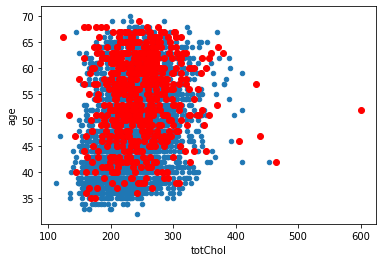

In [9]:
df[df.TenYearCHD == 0].plot.scatter(x='totChol',y='age')
temp = df[df.TenYearCHD == 1]
plt.scatter(temp['totChol'],temp['age'],c='r')


In [10]:
best_accu = 0
best_c = 0

for c in np.linspace(0.01,1,99):
    temp_model = SVC(kernel='linear',C=c)
    
    temp_model.fit(x,y)
    if temp_model.score(x,y) > best_accu:
        best_accu = temp_model.score(x,y)
        best_c = c
        
print(best_accu)
print(best_c)

0.8476477024070022
0.01
